<a href="https://colab.research.google.com/github/yashwanth145/newcatvsdogclassification/blob/main/Copy_of_Dogcatclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dog-vs-cat-classification

dog-vs-cat-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting the dataset

In [ ]:
from zipfile import ZipFile
dataset = '/content/dog-vs-cat-classification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

dog-vs-cat-classification.zip  resized	    sample_submission.csv  train
kaggle.json		       sample_data  test


In [ ]:
import os

path = '/content/train/train'  # Path containing 'cats' and 'dogs' folders
# Get file counts in each subdirectory
cat_count = len(os.listdir(os.path.join(path, 'cats')))
dog_count = len(os.listdir(os.path.join(path, 'dogs')))
file_count = cat_count + dog_count
print(f"Number of cat images: {cat_count}")
print(f"Number of dog images: {dog_count}")
print(f"Total number of images: {file_count}")

Number of cat images: 12500
Number of dog images: 12500
Total number of images: 25000


In [ ]:
filenames1=os.listdir('/content/train/train/cats')
filenames2=os.listdir('/content/train/train/dogs')
filenames=filenames1+filenames2
print(filenames)

['cat.11904.jpg', 'cat.7702.jpg', 'cat.5917.jpg', 'cat.4408.jpg', 'cat.11246.jpg', 'cat.4937.jpg', 'cat.3471.jpg', 'cat.4073.jpg', 'cat.12496.jpg', 'cat.9732.jpg', 'cat.4065.jpg', 'cat.7999.jpg', 'cat.6320.jpg', 'cat.847.jpg', 'cat.8798.jpg', 'cat.7705.jpg', 'cat.6271.jpg', 'cat.11336.jpg', 'cat.9996.jpg', 'cat.9864.jpg', 'cat.1595.jpg', 'cat.8430.jpg', 'cat.1424.jpg', 'cat.6536.jpg', 'cat.10183.jpg', 'cat.1640.jpg', 'cat.3876.jpg', 'cat.11735.jpg', 'cat.4311.jpg', 'cat.1944.jpg', 'cat.2454.jpg', 'cat.4288.jpg', 'cat.10970.jpg', 'cat.1815.jpg', 'cat.225.jpg', 'cat.3934.jpg', 'cat.519.jpg', 'cat.158.jpg', 'cat.5226.jpg', 'cat.8597.jpg', 'cat.7058.jpg', 'cat.8032.jpg', 'cat.4798.jpg', 'cat.3420.jpg', 'cat.6272.jpg', 'cat.2090.jpg', 'cat.843.jpg', 'cat.1794.jpg', 'cat.6748.jpg', 'cat.943.jpg', 'cat.9984.jpg', 'cat.11308.jpg', 'cat.219.jpg', 'cat.9297.jpg', 'cat.700.jpg', 'cat.3005.jpg', 'cat.5800.jpg', 'cat.8623.jpg', 'cat.6866.jpg', 'cat.5164.jpg', 'cat.90.jpg', 'cat.10072.jpg', 'cat.358

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from google.colab.patches import cv2_imshow
import cv2

Displaying the images

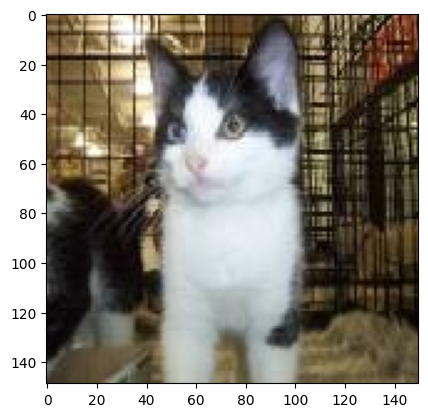

In [ ]:
img=mpimg.imread('/content/train/train/cats/cat.1000.jpg')
imgplot=plt.imshow(img)
plt.show()

Resizing the images

In [ ]:
filename1=os.listdir('/content/train/train/cats')
filename2=os.listdir('/content/train/train/dogs')
filenames=filename1+filename2
dogcnt=0
catcnt=0

for i in range(len(filenames)):
  val=filenames[i][0:3]
  if(val=="dog"):
      dogcnt+=1
  else:
      catcnt+=1


In [ ]:

print(dogcnt)
print(catcnt)

12500
12500


In [ ]:
!mkdir -p /content/resized2

In [ ]:
original_folder='/content/train/train/'
resized_folder='/content/resized2/'

for i in range(1000):
  filename1=os.listdir(original_folder+'cats')[i]
  filename2=os.listdir(original_folder+'dogs')[i]
  img1=Image.open(original_folder+'cats/'+filename1)
  img1=img1.resize((224,224))
  img2=Image.open(original_folder+'dogs/'+filename2)
  img2=img2.resize((224,224))
  img1.save(resized_folder+'cat.'+str(i)+'.jpg')
  img2.save(resized_folder+'dog.'+str(i)+'.jpg')
  print(filename1)
  print(filename2)


cat.11904.jpg
dog.8544.jpg
cat.7702.jpg
dog.1875.jpg
cat.5917.jpg
dog.5902.jpg
cat.4408.jpg
dog.5962.jpg
cat.11246.jpg
dog.4842.jpg
cat.4937.jpg
dog.7688.jpg
cat.3471.jpg
dog.3282.jpg
cat.4073.jpg
dog.10906.jpg
cat.12496.jpg
dog.8525.jpg
cat.9732.jpg
dog.12174.jpg
cat.4065.jpg
dog.764.jpg
cat.7999.jpg
dog.3888.jpg
cat.6320.jpg
dog.7979.jpg
cat.847.jpg
dog.4780.jpg
cat.8798.jpg
dog.2169.jpg
cat.7705.jpg
dog.9047.jpg
cat.6271.jpg
dog.8524.jpg
cat.11336.jpg
dog.1886.jpg
cat.9996.jpg
dog.2782.jpg
cat.9864.jpg
dog.4865.jpg
cat.1595.jpg
dog.8123.jpg
cat.8430.jpg
dog.10169.jpg
cat.1424.jpg
dog.3718.jpg
cat.6536.jpg
dog.1020.jpg
cat.10183.jpg
dog.441.jpg
cat.1640.jpg
dog.6989.jpg
cat.3876.jpg
dog.4792.jpg
cat.11735.jpg
dog.3662.jpg
cat.4311.jpg
dog.3700.jpg
cat.1944.jpg
dog.3919.jpg
cat.2454.jpg
dog.1978.jpg
cat.4288.jpg
dog.10126.jpg
cat.10970.jpg
dog.11239.jpg
cat.1815.jpg
dog.3529.jpg
cat.225.jpg
dog.3211.jpg
cat.3934.jpg
dog.11804.jpg
cat.519.jpg
dog.2882.jpg
cat.158.jpg
dog.12486.jpg
cat.

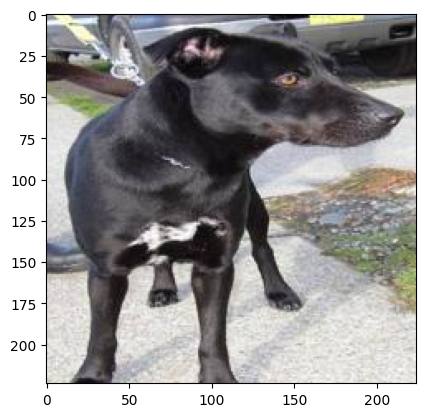

In [ ]:
img=mpimg.imread('/content/resized2/dog.253.jpg')
imgplot=plt.imshow(img)
plt.show()

Creating labels for images

In [ ]:
filenames=os.listdir('/content/resized2')
labels=[]
for i in range(2000):
  filename=filenames[i];
  lab=filename[0:3]

  if(lab=="dog"):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
dogcnt=list.count(labels,1)
catcnt=list.count(labels,0)
print(dogcnt)
print(catcnt)

1000
1000


Converting all images into a numpy array

In [ ]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
image_dir = '/content/resized2/'
image_ext = ['jpg', 'png']
files = []
for ext in image_ext:
    files.extend(glob.glob(os.path.join(image_dir, f'*.{ext}')))

# Optional: Resize images to same shape if needed
images = []
for file in files:
    img = Image.open(file).convert('RGB')  # Convert to RGB
    img = img.resize((224, 224))  # Resize for uniformity
    images.append(np.asarray(img))

dof_cat_images = np.array(images)

In [ ]:
print(dof_cat_images)

[[[[ 18  14   3]
   [ 20  16   5]
   [ 22  18   7]
   ...
   [ 49  35   6]
   [ 53  40   8]
   [ 54  41   9]]

  [[ 20  16   5]
   [ 21  17   6]
   [ 22  18   7]
   ...
   [ 49  35   6]
   [ 54  41   9]
   [ 55  42  10]]

  [[ 24  17   7]
   [ 24  17   7]
   [ 22  18   7]
   ...
   [ 50  36   7]
   [ 54  41   9]
   [ 55  42  10]]

  ...

  [[153 173 174]
   [149 169 170]
   [145 165 166]
   ...
   [  3   3   3]
   [  3   3   3]
   [  3   3   3]]

  [[148 170 168]
   [150 172 170]
   [153 174 175]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]

  [[159 181 179]
   [156 178 176]
   [152 173 174]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]]


 [[[ 64  63  42]
   [ 67  69  47]
   [ 74  75  57]
   ...
   [ 74  77  92]
   [ 85  90 109]
   [ 54  59  78]]

  [[ 51  50  29]
   [ 56  58  37]
   [ 63  66  47]
   ...
   [ 76  79  94]
   [ 74  80  96]
   [ 68  73  92]]

  [[ 47  49  28]
   [ 54  56  35]
   [ 61  64  45]
   ...
   [ 91  94 109]
   [ 94 100 116]
   [119 125

In [ ]:
print(dof_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X=dof_cat_images
Y=np.array(labels)

Train testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(1600,)


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
print(x_test_scaled)

[[[[0.69019608 0.55686275 0.40784314]
   [0.6        0.46666667 0.31764706]
   [0.63921569 0.50588235 0.35686275]
   ...
   [0.55686275 0.42745098 0.25882353]
   [0.6        0.47058824 0.30196078]
   [0.72941176 0.6        0.43137255]]

  [[0.70196078 0.56862745 0.41960784]
   [0.58431373 0.45098039 0.30196078]
   [0.58823529 0.45490196 0.30588235]
   ...
   [0.61176471 0.48235294 0.31372549]
   [0.6627451  0.53333333 0.36470588]
   [0.7372549  0.60784314 0.43921569]]

  [[0.59215686 0.45882353 0.30980392]
   [0.52941176 0.39607843 0.24705882]
   [0.57254902 0.43921569 0.29019608]
   ...
   [0.65098039 0.52156863 0.35294118]
   [0.71764706 0.58823529 0.41960784]
   [0.74509804 0.61568627 0.44705882]]

  ...

  [[0.61176471 0.48627451 0.3372549 ]
   [0.56078431 0.43529412 0.28627451]
   [0.55294118 0.42745098 0.27843137]
   ...
   [0.6        0.4627451  0.29803922]
   [0.64705882 0.50980392 0.34509804]
   [0.70588235 0.56862745 0.40392157]]

  [[0.66666667 0.54117647 0.39215686]
   [0.6

Building neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=True)

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

num_classes = 2

# Load the pretrained model from TF Hub with trainable=True for fine-tuning
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
hub_layer = hub.KerasLayer(feature_extractor_url, trainable=True)  # fine-tuning enabled

# Build the model
inputs = tf.keras.Input(shape=(224, 224, 3))

# Preprocessing and augmentation
x = layers.Rescaling(1./255)(inputs)
x = layers.RandomFlip("horizontal")(x)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

# Wrap hub layer inside Lambda to avoid symbolic tensor issue
x = tf.keras.layers.Lambda(lambda x: hub_layer(x, training=True))(x)

# Add extra dense layers
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,594 (1.28 MB)

 Trainable params: 331,522 (1.26 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
print(x_train_scaled.shape)
print(y_train.shape)

(1600, 224, 224, 3)
(1600,)


In [ ]:
model.fit(x_train_scaled,y_train,epochs=15)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6010 - loss: 0.9139
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.7931 - loss: 0.4924
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8570 - loss: 0.3842
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8356 - loss: 0.3563
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8687 - loss: 0.3536
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8785 - loss: 0.3055
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8787 - loss: 0.3007
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8720 - loss: 0.3388
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8653 - loss: 0.3482
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8753 - loss: 0.2994
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8910 - loss: 0.2972
Epoch 12/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy

In [ ]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('Test loss:',score)
print('Test accuracy:',acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9163 - loss: 0.2147
Test loss: 0.20635515451431274
Test accuracy: 0.9100000262260437


In [ ]:

inputimage = input("Enter the path to the image: ")
input_image = cv2.imread(inputimage)
input_image = cv2.resize(input_image, (224, 224))
input_image_rescaled = input_image / 255.0
input_image_reshaped = np.reshape(input_image_rescaled, [1, 224, 224, 3])

input_prediction = model.predict(input_image_reshaped)
predlabel = np.argmax(input_prediction)
print(predlabel)

Enter the path to the image: /content/test/test/000003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1
